In [4]:
import pandas as pd
import numpy as np

In [5]:
movies1 = pd.read_csv('Movie-Ratings.csv')

In [6]:
movies1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [7]:
movies1.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies1.columns = ['Film', 'Genre', 'CriticsRatings', 'AudienceRatings', 'BudgetMillions', 'Year']

In [9]:
movies1.head()

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
movies1.Year.dtype

dtype('int64')

In [8]:
movies1.Year = movies1.Year.astype('category')

In [9]:
movies1.head()

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[]

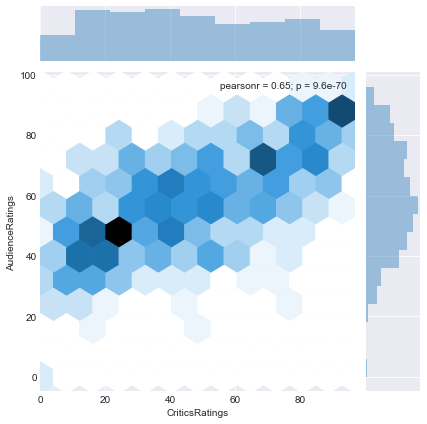

In [13]:
sns.set_style('darkgrid')
sns.jointplot(data= movies1, x='CriticsRatings', y='AudienceRatings', kind='hex')
plt.plot()
# a hex plot between crtic ratings and audience ratings
# strong correlations observed at intense colored hexagons around(25,50), (70,70) and (95,95)

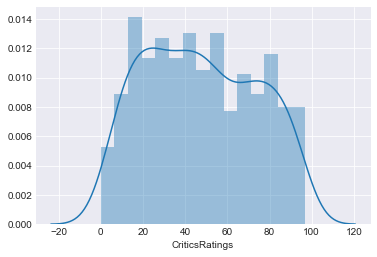

In [13]:
sns.distplot(movies1.CriticsRatings, bins = 15)

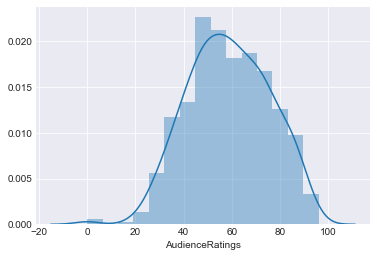

In [12]:
sns.distplot(movies1.AudienceRatings, bins = 15)

In [13]:
movies1.Genre = movies1.Genre.astype('category')

In [16]:
movies1.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [18]:
new = []
mylist = []
for gen in movies1.Genre.cat.categories:
    new.append(movies1[movies1.Genre == gen].BudgetMillions)
    mylist.append(gen)

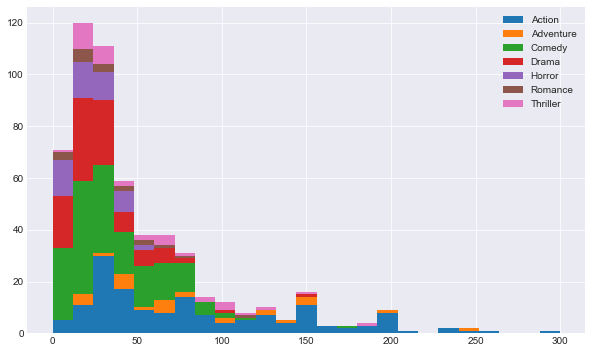

In [19]:
plt.rcParams['figure.figsize'] = 10, 6
h = plt.hist(new, bins = 25, stacked = True, label = mylist)
plt.legend()
plt.show()

Stacked histogram showing the collections of different genres of movies. 

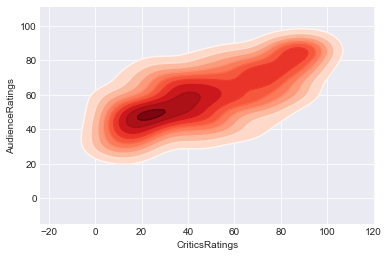

In [14]:
k1 = sns.kdeplot(movies1.CriticsRatings, movies1.AudienceRatings, shade = True, shade_lowest = False, cmap = 'Reds')
k2 = sns.kdeplot(movies1.CriticsRatings, movies1.AudienceRatings, cmap = 'Reds')

 A kernal density plot showing the density between audience ratings and critcs ratings.

[(-20, 160)]

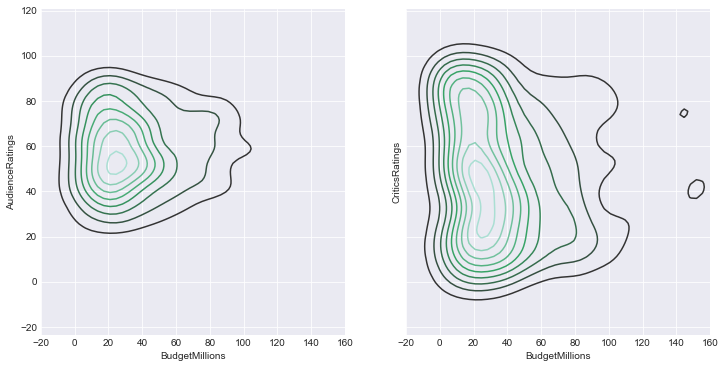

In [20]:
f, axes = plt.subplots(1, 2, figsize = (12,6), sharex = True, sharey = True)
k3 = sns.kdeplot(movies1.BudgetMillions, movies1.AudienceRatings, ax = axes[0])
k4 = sns.kdeplot(movies1.BudgetMillions, movies1.CriticsRatings, ax = axes[1])
k3.set(xlim = (-20, 160))

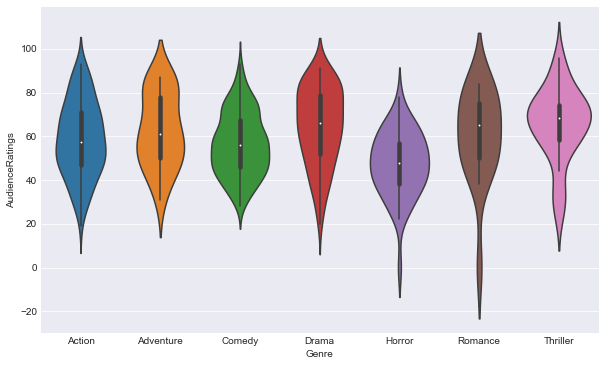

In [21]:
v1 = sns.violinplot(movies1.Genre, movies1.AudienceRatings)
#violin plots also show the regions of data concentration w

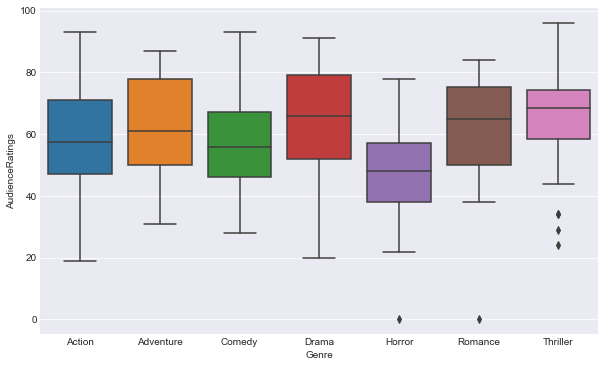

In [22]:
b1 = sns.boxplot(movies1.Genre, movies1.AudienceRatings)

---

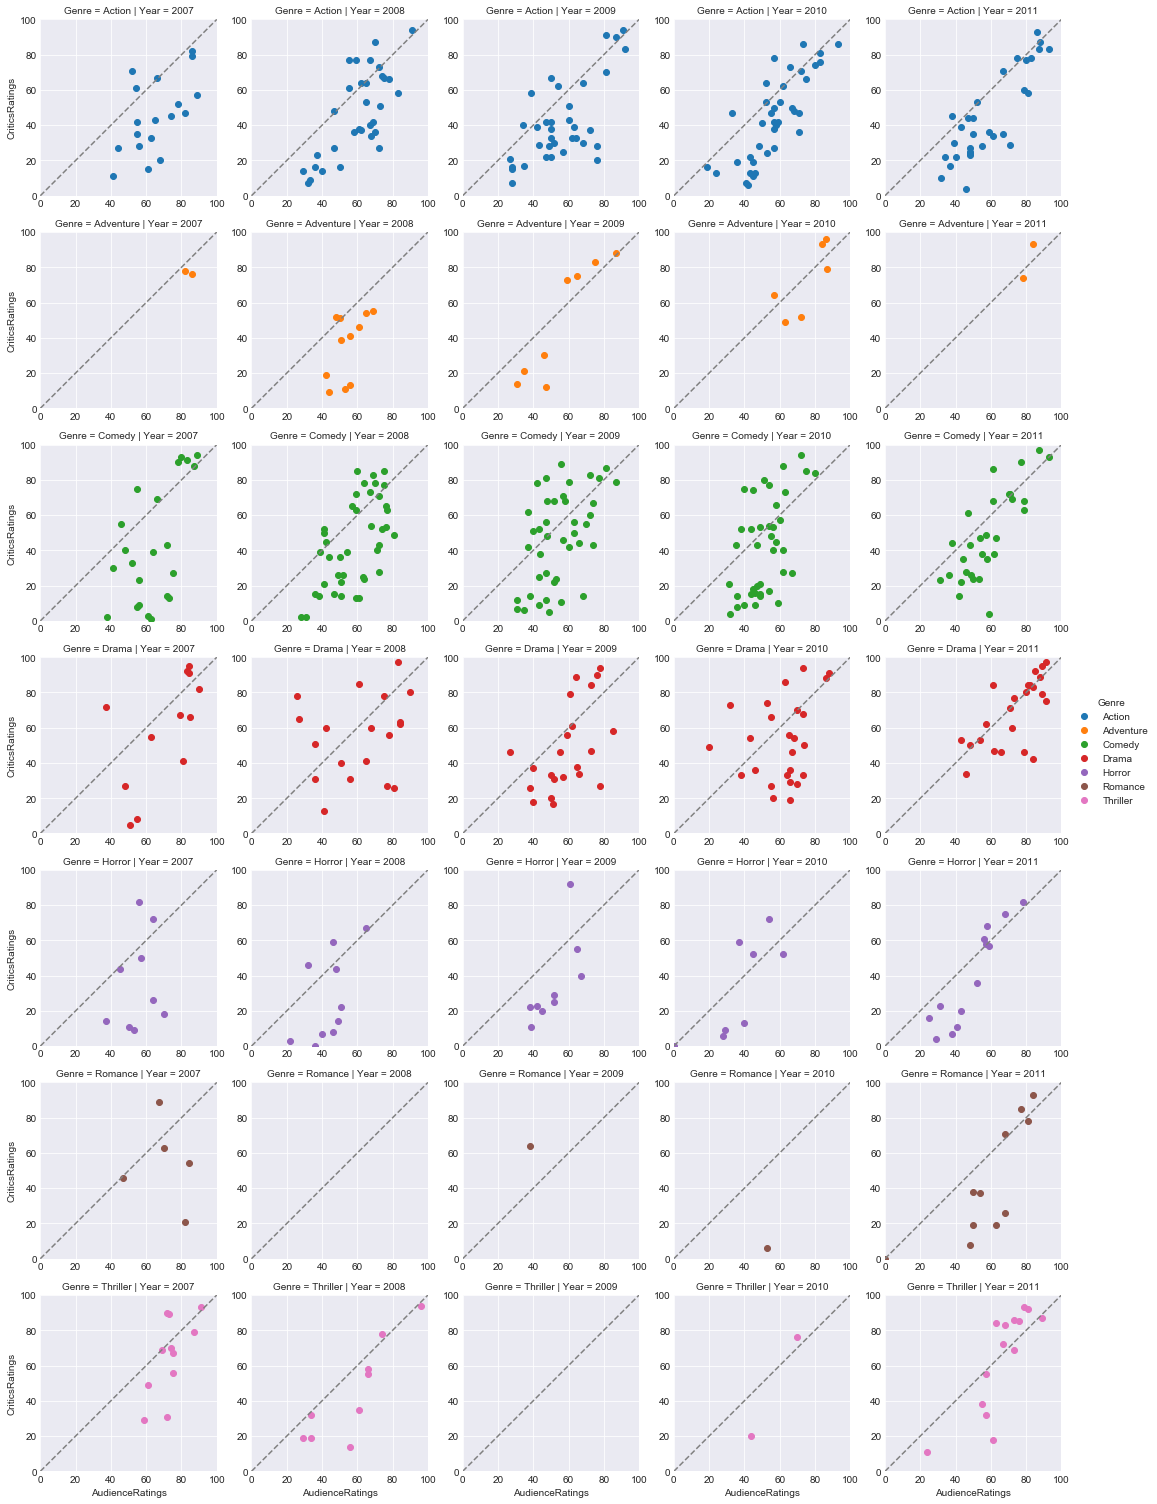

In [34]:
#FacetGrid
g = sns.FacetGrid(movies1, row= 'Genre', col= 'Year', hue = 'Genre')
g = g.map(plt.scatter, 'AudienceRatings', 'CriticsRatings')
g.set(xlim = (0,100), ylim = (0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c = 'gray', ls = '--')
g.add_legend()

---